# In this notebook we plan paths for multiple agents on the hybrid graph and animate the result.

In [48]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center
from panav.hybrid import HybridGraph
from panav.viz import draw_env,draw_hybrid
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
def flowtime(plan):
    return np.sum([t[-1] for t,x in plan])

## Single-tunnel environment

In [75]:


# 2D navigation environment

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 6,-6
start_x_offset = 7
goal_x_offset = 9
N = 5

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]


# O1 = Box2DRegion((-5.0,-0.5),(0.5,10))
# O2 = Box2DRegion((-0.0,5.0),(-10,-1.0))
# env = NavigationEnv(limits,[O1,O2],starts,goals)


O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O1 = Box2DRegion((-2.5,2.5),(2.0,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))
env = NavigationEnv(limits,[O1,O2],starts,goals)


# O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
# O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))
# env = NavigationEnv(limits,[O1,O2,O3],starts,goals)


# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r,K = 4)


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


KeyError: 'continuous_path'

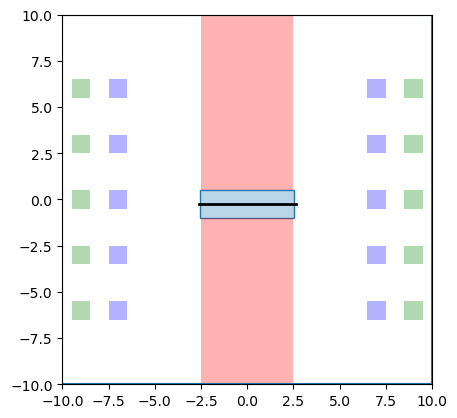

In [51]:
ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    

In [103]:
from panav.HybridSIPP import HybridSIPP
from panav.SIPP import plan_to_transitions
from time import time

agents = np.arange(len(start_locs))
graph_plans = []
continuous_plans = []

success = True
times = []
t0 = time()
for a in agents:
    print(a)
    result = HybridSIPP(HG,HG.start_nodes[a],HG.goal_nodes[a],graph_plans,continuous_plans)
    if result is not None:
        gp,cp = result
        # gp = result
    else:
        print("Solver failed. Exiting...")
        success=False
        break
    graph_plans.append(gp)
    continuous_plans.append(cp)
    
    times.append(time()-t0)
if success:
    print("Solution success")

0
1
2
3
4
5
6
7
8
9
Solution success
